**Step 1: Import Libraries, as per the needs of your project, you add more later if needed.**

In [ ]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

**Step 2: Get the HTML in a string, in a variable**

Way 1: Directly through request.get

In [ ]:
response1 = requests.get("https://visaguide.world/asia/")
response1 = response1.text
type(response1)

str

Way 2: Inspecting and Copying Outer HTML of the webpage, in particular the table, in a text file, and then reading it to get the html content in a string

In [ ]:
with open("tabledata.txt", "r") as file:
  response2 = file.read()

type(response2)

str

**Step 3: Making a Beautiful Soup object with help of the string that we got, and the "html.parser"**

Way 1

In [ ]:
densitysoup1 = BeautifulSoup(response1, "html.parser")
type(densitysoup1)

bs4.BeautifulSoup

Way 2

In [ ]:
densitysoup2 = BeautifulSoup(response2, "html.parser")
type(densitysoup2)

bs4.BeautifulSoup

**Step 4: Find the table**

Way 1: Since in this way we have the whole html content, find all the tables, and then by checking the headings by <th> tag we gonna find which table is our table

In [ ]:
densitytable1 = densitysoup1.find_all("table")
len(densitytable1)

3

In [ ]:
headings0 = densitytable1[0].find_all("th")
headings0

[]

In [ ]:
headings1 = densitytable1[1].find_all("th")
headings1

[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [ ]:
headings2 = densitytable1[2].find_all("th")
headings2

[<th>Language</th>, <th>Regions</th>, <th>Number of speakers</th>]

In [ ]:
headings_list1 = [i.text for i in headings1]
headings_list1

['Country', 'Capital', 'Area km2', 'Population (2021)']

Way 2: Since we have only one table, using find we make that table

In [ ]:
densitytable2 = densitysoup2.find("table")


In [ ]:
headings_table2 = densitysoup2.find_all("th")
headings_table2

[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [ ]:
headings_list_table2 = [i.text for i in headings_table2]
headings_list_table2

['Country', 'Capital', 'Area km2', 'Population (2021)']

Checking we have same data or not

In [ ]:
densitytable1[1]==densitytable2

True

Now we merge both ways, and make a single table

In [ ]:
densitytable = densitytable2

**Step 5: Find the table contents**

# **Way 1: Directly go to 'th' and 'td' tags which are inside the 'tr' tags**



HEADER ROW

In [ ]:
heading_tags = densitytable.find_all('th')
heading_tags

[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [ ]:
density_headings = [i.text for i in heading_tags]
density_headings

['Country', 'Capital', 'Area km2', 'Population (2021)']

ALL OTHER ROWS

In [ ]:
row_tags = densitytable.find_all('td')
row_tags

[<td>Afghanistan</td>,
 <td>Kabul</td>,
 <td>652,864</td>,
 <td>39,835,428</td>,
 <td>Armenia</td>,
 <td>Yerevan</td>,
 <td>29,743</td>,
 <td>2,968,127</td>,
 <td>Azerbaijan</td>,
 <td>Baku</td>,
 <td>86,600</td>,
 <td>10,223,342</td>,
 <td>Bahrain</td>,
 <td>Manama</td>,
 <td>760</td>,
 <td>1,748,296</td>,
 <td>Bangladesh</td>,
 <td>Dhaka</td>,
 <td>147,570</td>,
 <td>166,303,498</td>,
 <td>Bhutan</td>,
 <td>Thimphu</td>,
 <td>38,394</td>,
 <td>779,898</td>,
 <td>Brunei</td>,
 <td>Bandar Seri Begawan</td>,
 <td>5,765</td>,
 <td>441,532</td>,
 <td>Cambodia</td>,
 <td>Phnom Penh</td>,
 <td>181,035</td>,
 <td>16,946,438</td>,
 <td>China (PRC)</td>,
 <td>Beijing</td>,
 <td>9,596,961</td>,
 <td>1,444,216,107</td>,
 <td>East Timor</td>,
 <td>Dili</td>,
 <td>14,874</td>,
 <td>1,343,873</td>,
 <td>Georgia</td>,
 <td>Tbilisi</td>,
 <td>69,700</td>,
 <td>3,979,765</td>,
 <td>Hong Kong</td>,
 <td>City of Victoria</td>,
 <td>2,755</td>,
 <td>7,552,810</td>,
 <td>India</td>,
 <td>New Delhi</td>,
 

In [ ]:
densityrows = [i.text for i in row_tags]
densityrows

['Afghanistan',
 'Kabul',
 '652,864',
 '39,835,428',
 'Armenia',
 'Yerevan',
 '29,743',
 '2,968,127',
 'Azerbaijan',
 'Baku',
 '86,600',
 '10,223,342',
 'Bahrain',
 'Manama',
 '760',
 '1,748,296',
 'Bangladesh',
 'Dhaka',
 '147,570',
 '166,303,498',
 'Bhutan',
 'Thimphu',
 '38,394',
 '779,898',
 'Brunei',
 'Bandar Seri Begawan',
 '5,765',
 '441,532',
 'Cambodia',
 'Phnom Penh',
 '181,035',
 '16,946,438',
 'China (PRC)',
 'Beijing',
 '9,596,961',
 '1,444,216,107',
 'East Timor',
 'Dili',
 '14,874',
 '1,343,873',
 'Georgia',
 'Tbilisi',
 '69,700',
 '3,979,765',
 'Hong Kong',
 'City of Victoria',
 '2,755',
 '7,552,810',
 'India',
 'New Delhi',
 '3,287,263',
 '1,393,409,038',
 'Indonesia',
 'Jakarta',
 '1,904,569',
 '276,361,783',
 'Iran',
 'Tehran',
 '1,648,195',
 '85,028,759',
 'Iraq',
 'Baghdad',
 '438,317',
 '41,179,350',
 'Israel',
 'Jerusalem (disputed)',
 '20,770',
 '8,789,774',
 'Japan',
 'Tokyo',
 '377,915',
 '126,050,804',
 'Jordan',
 'Amman',
 '89,342',
 '10,269,021',
 'Kazakhst

**Step 6: Making Dictionary for DataFrame, then Making DataFrame**

Step 6.1: Understanding how dictionary should be made for DataFrame

In [ ]:
from ast import Name
NameAgeData={}
NameAgeData['Name']=["Tom", "Jerry", "Donald", "Popeye"]
NameAgeData['Age'] =[80, 60, 100, 45]

print(NameAgeData)

{'Name': ['Tom', 'Jerry', 'Donald', 'Popeye'], 'Age': [80, 60, 100, 45]}


Convering Dictionary to DataFrame

In [ ]:
df_nameage = pd.DataFrame(NameAgeData)
df_nameage

,Name,Age
0,Tom,80
1,Jerry,60
2,Donald,100
3,Popeye,45


Stage 6.2: Making Dictionary in same format using header row and other rows data


In [ ]:
densitydict = {}
n = 0
for i in density_headings:
  densitydict[i] = [densityrows[j] for j in range(n, len(densityrows), len(density_headings))]
  n +=1

densitydict


{'Country': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China (PRC)',
  'East Timor',
  'Georgia',
  'Hong Kong',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Kyrgyzstan',
  'Laos',
  'Lebanon',
  'Macau',
  'Malaysia',
  'Maldives',
  'Mongolia',
  'Myanmar',
  'Nepal',
  'North Korea',
  'Oman',
  'Pakistan',
  'Palestine',
  'Qatar',
  'Russia',
  'Saudi Arabia',
  'Singapore',
  'South Korea',
  'Sri Lanka',
  'Syria',
  'Taiwan',
  'Tajikistan',
  'Thailand',
  'The Philippines',
  'Turkey',
  'Turkmenistan',
  'United Arab Emirates',
  'Uzbekistan',
  'Vietnam',
  'Yemen'],
 'Capital': ['Kabul',
  'Yerevan',
  'Baku',
  'Manama',
  'Dhaka',
  'Thimphu',
  'Bandar Seri Begawan',
  'Phnom Penh',
  'Beijing',
  'Dili',
  'Tbilisi',
  'City of Victoria',
  'New Delhi',
  'Jakarta',
  'Tehran',
  'Baghdad',
  'Jerusalem (disputed)',
  'Tokyo',
  'Am

Converting to DataFrame

In [ ]:
densitydf = pd.DataFrame(densitydict)
densitydf.index = range(1, len(densitydf)+1)
densitydf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


# **Way 2: Go to 'tr' tags first**

In [ ]:
allrows_tag = densitytable.find_all('tr')
allrows_tag

[<tr>
 <th>Country</th>
 <th>Capital</th>
 <th>Area km2</th>
 <th>Population (2021)</th>
 </tr>,
 <tr>
 <td>Afghanistan</td>
 <td>Kabul</td>
 <td>652,864</td>
 <td>39,835,428</td>
 </tr>,
 <tr>
 <td>Armenia</td>
 <td>Yerevan</td>
 <td>29,743</td>
 <td>2,968,127</td>
 </tr>,
 <tr>
 <td>Azerbaijan</td>
 <td>Baku</td>
 <td>86,600</td>
 <td>10,223,342</td>
 </tr>,
 <tr>
 <td>Bahrain</td>
 <td>Manama</td>
 <td>760</td>
 <td>1,748,296</td>
 </tr>,
 <tr>
 <td>Bangladesh</td>
 <td>Dhaka</td>
 <td>147,570</td>
 <td>166,303,498</td>
 </tr>,
 <tr>
 <td>Bhutan</td>
 <td>Thimphu</td>
 <td>38,394</td>
 <td>779,898</td>
 </tr>,
 <tr>
 <td>Brunei</td>
 <td>Bandar Seri Begawan</td>
 <td>5,765</td>
 <td>441,532</td>
 </tr>,
 <tr>
 <td>Cambodia</td>
 <td>Phnom Penh</td>
 <td>181,035</td>
 <td>16,946,438</td>
 </tr>,
 <tr>
 <td>China (PRC)</td>
 <td>Beijing</td>
 <td>9,596,961</td>
 <td>1,444,216,107</td>
 </tr>,
 <tr>
 <td>East Timor</td>
 <td>Dili</td>
 <td>14,874</td>
 <td>1,343,873</td>
 </tr>,
 <tr>


In [ ]:
for i in allrows_tag[:1]:
  print(i)
  break

<tr>
<th>Country</th>
<th>Capital</th>
<th>Area km2</th>
<th>Population (2021)</th>
</tr>


HEADER ROW

In [ ]:

for i in allrows_tag[:1]:
  headings_tag = i.find_all('th')
  print(headings_tag)
  headings = [j.text.strip() for j in heading_tags]
  print(headings)
#print(headings_tag)

#or
# headings_tag = [i.find_all('th') for i in allrows_tag[:1]]
# print(headings_tag)

[<th>Country</th>, <th>Capital</th>, <th>Area km2</th>, <th>Population (2021)</th>]
['Country', 'Capital', 'Area km2', 'Population (2021)']


ALL OTHER ROWS

In [ ]:
flag = 0
other_rows = []
for i in allrows_tag[1:]:
  print(i)
  row_tags = i.find_all('td')
  print(row_tags)
  rows = [j.text.strip() for j in row_tags]
  other_rows.append(rows)
  if flag == 2:break
  flag +=1
print(other_rows)

<tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>
[<td>Afghanistan</td>, <td>Kabul</td>, <td>652,864</td>, <td>39,835,428</td>]
<tr>
<td>Armenia</td>
<td>Yerevan</td>
<td>29,743</td>
<td>2,968,127</td>
</tr>
[<td>Armenia</td>, <td>Yerevan</td>, <td>29,743</td>, <td>2,968,127</td>]
<tr>
<td>Azerbaijan</td>
<td>Baku</td>
<td>86,600</td>
<td>10,223,342</td>
</tr>
[<td>Azerbaijan</td>, <td>Baku</td>, <td>86,600</td>, <td>10,223,342</td>]
[['Afghanistan', 'Kabul', '652,864', '39,835,428'], ['Armenia', 'Yerevan', '29,743', '2,968,127'], ['Azerbaijan', 'Baku', '86,600', '10,223,342']]


In [ ]:
flag = 0
other_rows = []
for i in allrows_tag[1:]:
  #print(i)
  row_tags = i.find_all('td')
  #print(row_tags)
  rows = [j.text.strip() for j in row_tags]
  other_rows.append(rows)

print(other_rows)

[['Afghanistan', 'Kabul', '652,864', '39,835,428'], ['Armenia', 'Yerevan', '29,743', '2,968,127'], ['Azerbaijan', 'Baku', '86,600', '10,223,342'], ['Bahrain', 'Manama', '760', '1,748,296'], ['Bangladesh', 'Dhaka', '147,570', '166,303,498'], ['Bhutan', 'Thimphu', '38,394', '779,898'], ['Brunei', 'Bandar Seri Begawan', '5,765', '441,532'], ['Cambodia', 'Phnom Penh', '181,035', '16,946,438'], ['China (PRC)', 'Beijing', '9,596,961', '1,444,216,107'], ['East Timor', 'Dili', '14,874', '1,343,873'], ['Georgia', 'Tbilisi', '69,700', '3,979,765'], ['Hong Kong', 'City of Victoria', '2,755', '7,552,810'], ['India', 'New Delhi', '3,287,263', '1,393,409,038'], ['Indonesia', 'Jakarta', '1,904,569', '276,361,783'], ['Iran', 'Tehran', '1,648,195', '85,028,759'], ['Iraq', 'Baghdad', '438,317', '41,179,350'], ['Israel', 'Jerusalem (disputed)', '20,770', '8,789,774'], ['Japan', 'Tokyo', '377,915', '126,050,804'], ['Jordan', 'Amman', '89,342', '10,269,021'], ['Kazakhstan', 'Nur-Sultan', '2,724,900', '18,9

**Step 6: Making Dictionary for DataFrame AND then making a DataFrame**

Step 6.1: Understanding how dictionary should be made for DataFrame

In [ ]:
from ast import Name
NameAgeData={}
NameAgeData['Name']=["Tom", "Jerry", "Donald", "Popeye"]
NameAgeData['Age'] =[80, 60, 100, 45]

print(NameAgeData)

{'Name': ['Tom', 'Jerry', 'Donald', 'Popeye'], 'Age': [80, 60, 100, 45]}


Convering Dictionary to DataFrame

In [ ]:
df_nameage = pd.DataFrame(NameAgeData)
df_nameage

,Name,Age
0,Tom,80
1,Jerry,60
2,Donald,100
3,Popeye,45


Stage 6.2: Making Dictionary in same format using header row and other rows data


In [ ]:
densitydict ={}
n=0
for i in headings:
  densitydict[i] = [other_rows[j][n] for j in range(len(other_rows))]
  break
densitydict

{'Country': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China (PRC)',
  'East Timor',
  'Georgia',
  'Hong Kong',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Kyrgyzstan',
  'Laos',
  'Lebanon',
  'Macau',
  'Malaysia',
  'Maldives',
  'Mongolia',
  'Myanmar',
  'Nepal',
  'North Korea',
  'Oman',
  'Pakistan',
  'Palestine',
  'Qatar',
  'Russia',
  'Saudi Arabia',
  'Singapore',
  'South Korea',
  'Sri Lanka',
  'Syria',
  'Taiwan',
  'Tajikistan',
  'Thailand',
  'The Philippines',
  'Turkey',
  'Turkmenistan',
  'United Arab Emirates',
  'Uzbekistan',
  'Vietnam',
  'Yemen']}

In [ ]:
densitydict ={}
n=0
for i in headings:
  densitydict[i] = [other_rows[j][n] for j in range(len(other_rows))]
  n+=1
densitydict

{'Country': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China (PRC)',
  'East Timor',
  'Georgia',
  'Hong Kong',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Kyrgyzstan',
  'Laos',
  'Lebanon',
  'Macau',
  'Malaysia',
  'Maldives',
  'Mongolia',
  'Myanmar',
  'Nepal',
  'North Korea',
  'Oman',
  'Pakistan',
  'Palestine',
  'Qatar',
  'Russia',
  'Saudi Arabia',
  'Singapore',
  'South Korea',
  'Sri Lanka',
  'Syria',
  'Taiwan',
  'Tajikistan',
  'Thailand',
  'The Philippines',
  'Turkey',
  'Turkmenistan',
  'United Arab Emirates',
  'Uzbekistan',
  'Vietnam',
  'Yemen'],
 'Capital': ['Kabul',
  'Yerevan',
  'Baku',
  'Manama',
  'Dhaka',
  'Thimphu',
  'Bandar Seri Begawan',
  'Phnom Penh',
  'Beijing',
  'Dili',
  'Tbilisi',
  'City of Victoria',
  'New Delhi',
  'Jakarta',
  'Tehran',
  'Baghdad',
  'Jerusalem (disputed)',
  'Tokyo',
  'Am

Making a Dataframe

In [ ]:
densitydf = pd.DataFrame(densitydict)
densitydf.index = range(1, len(densitydf)+1)
densitydf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


**Step 7: Adding Population Density column**

Step 7.1 Converting both Area and Population columns values to integers

In [ ]:
densitydf['Area km2']=densitydf['Area km2'].str.replace(",","").astype(int)
densitydf['Population (2021)']=densitydf['Population (2021)'].str.replace(",","").astype(int)

Step 7.2: Making a New Column "Population Density"

In [ ]:
densitydf['Population Density']=densitydf['Population (2021)']/densitydf['Area km2']
densitydf

,Country,Capital,Area km2,Population (2021),Population Density
1,Afghanistan,Kabul,652864,39835428,61.016426
2,Armenia,Yerevan,29743,2968127,99.792455
3,Azerbaijan,Baku,86600,10223342,118.052448
4,Bahrain,Manama,760,1748296,2300.389474
5,Bangladesh,Dhaka,147570,166303498,1126.946520
6,Bhutan,Thimphu,38394,779898,20.313018
7,Brunei,Bandar Seri Begawan,5765,441532,76.588378
8,Cambodia,Phnom Penh,181035,16946438,93.608628
9,China (PRC),Beijing,9596961,1444216107,150.486816
10,East Timor,Dili,14874,1343873,90.350477


Two decimal Places

In [ ]:
densitydf['Population Density'] = densitydf['Population Density'].map('{:.2f}'.format)
densitydf['Population Density'] = densitydf['Population Density'].astype(float)
densitydf

Step 8: Change Name of Columns if necessary

In [ ]:
densitydf.rename(columns={"Area km2": "Area(km2)", "Population (2021)": "Population"}, inplace=True)
densitydf

,Country,Capital,Area(km2),Population,Population Density
1,Afghanistan,Kabul,652864,39835428,61.016426
2,Armenia,Yerevan,29743,2968127,99.792455
3,Azerbaijan,Baku,86600,10223342,118.052448
4,Bahrain,Manama,760,1748296,2300.389474
5,Bangladesh,Dhaka,147570,166303498,1126.946520
6,Bhutan,Thimphu,38394,779898,20.313018
7,Brunei,Bandar Seri Begawan,5765,441532,76.588378
8,Cambodia,Phnom Penh,181035,16946438,93.608628
9,China (PRC),Beijing,9596961,1444216107,150.486816
10,East Timor,Dili,14874,1343873,90.350477


**Step 8: Make some plots that are meaningful**

Plot 1: Bar plot: Population Density vs Country

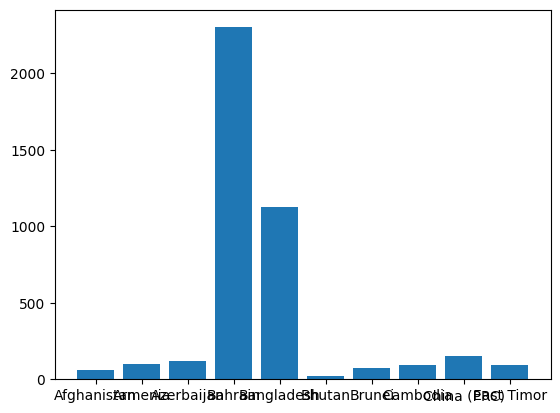

In [ ]:
x = densitydf['Country'][:10]
y = densitydf['Population Density'][:10]
plt.bar(x,y)
plt.show()


Working on Overlap

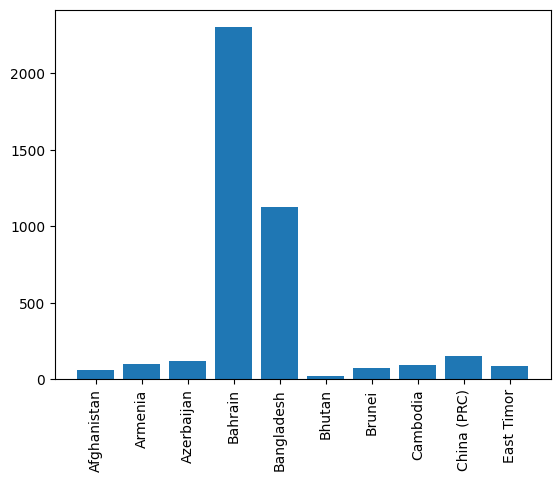

In [ ]:
x = densitydf['Country'][:10]
y = densitydf['Population Density'][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

# Working on Irregular Data

Make a Sorted Dataframe which is sorted by Population Density, default: Ascending Order

In [ ]:
densitydf_sorted = densitydf.sort_values(by="Population Density")
densitydf_sorted

,Country,Capital,Area(km2),Population,Population Density
28,Mongolia,Ulaanbaatar,1564116,3329289,2.128544
20,Kazakhstan,Nur-Sultan,2724900,18994962,6.970884
36,Russia,Moscow,17098242,145734038,8.523335
47,Turkmenistan,Ashgabat,488100,6117924,12.534161
37,Saudi Arabia,Riyadh,2149690,35340683,16.439897
32,Oman,Muscat,309500,5223375,16.876817
6,Bhutan,Thimphu,38394,779898,20.313018
23,Laos,Vientiane,236800,7379358,31.162829
22,Kyrgyzstan,Bishkek,199951,6628356,33.149902
15,Iran,Tehran,1648195,85028759,51.589016


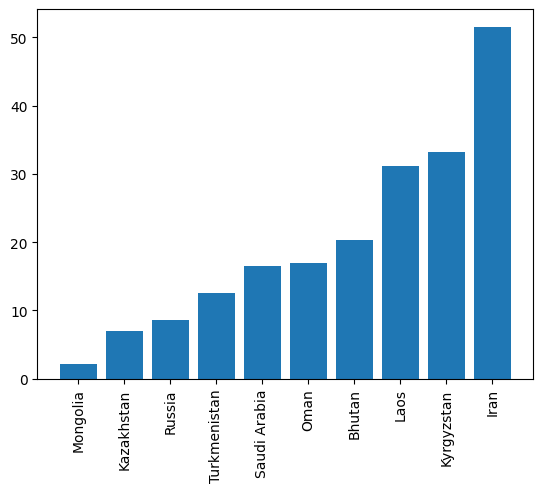

In [ ]:
x = densitydf_sorted['Country'][:10]
y = densitydf_sorted['Population Density'][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Descending Order

In [ ]:
densitydf_sorteddesc = densitydf.sort_values(by="Population Density", ascending = False)
densitydf_sorteddesc

,Country,Capital,Area(km2),Population,Population Density
38,Singapore,Singapore,697,5896686,8460.094692
25,Macau,Macau,115,658394,5725.165217
12,Hong Kong,City of Victoria,2755,7552810,2741.491833
4,Bahrain,Manama,760,1748296,2300.389474
27,Maldives,Malé,298,543617,1824.218121
5,Bangladesh,Dhaka,147570,166303498,1126.946520
34,Palestine,Ramallah,6220,5222748,839.670096
42,Taiwan,Taipei,36193,23855010,659.105628
24,Lebanon,Beirut,10400,6769146,650.879423
39,South Korea,Seoul,100210,51305186,511.976709


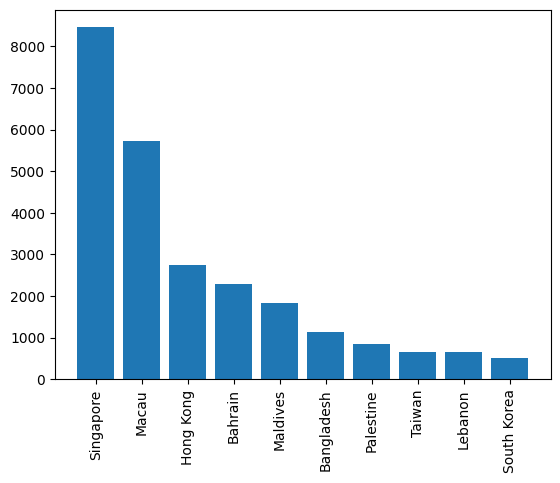

In [ ]:
x = densitydf_sorteddesc['Country'][:10]
y = densitydf_sorteddesc['Population Density'][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Population vs Population Density

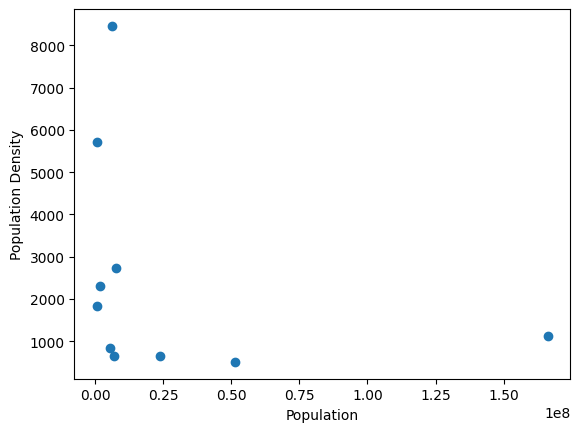

In [ ]:
x = densitydf_sorteddesc['Population'][:10]
y = densitydf_sorteddesc['Population Density'][:10]
plt.xlabel("Population")
plt.ylabel("Population Density")
plt.scatter(x,y)

plt.show()

Handling 10^8 value, making a new column "Population(in million)"

In [ ]:
densitydf['Population(million)'] = densitydf['Population']/10**6
densitydf

,Country,Capital,Area(km2),Population,Population Density,Population(million)
1,Afghanistan,Kabul,652864,39835428,61.016426,39.835428
2,Armenia,Yerevan,29743,2968127,99.792455,2.968127
3,Azerbaijan,Baku,86600,10223342,118.052448,10.223342
4,Bahrain,Manama,760,1748296,2300.389474,1.748296
5,Bangladesh,Dhaka,147570,166303498,1126.946520,166.303498
6,Bhutan,Thimphu,38394,779898,20.313018,0.779898
7,Brunei,Bandar Seri Begawan,5765,441532,76.588378,0.441532
8,Cambodia,Phnom Penh,181035,16946438,93.608628,16.946438
9,China (PRC),Beijing,9596961,1444216107,150.486816,1444.216107
10,East Timor,Dili,14874,1343873,90.350477,1.343873


Dropping an unnecssary column 'Population'

In [ ]:
densitydf = densitydf.drop("Population", axis=1)

In [ ]:
densitydf

,Country,Capital,Area(km2),Population Density,Population(million)
1,Afghanistan,Kabul,652864,61.016426,39.835428
2,Armenia,Yerevan,29743,99.792455,2.968127
3,Azerbaijan,Baku,86600,118.052448,10.223342
4,Bahrain,Manama,760,2300.389474,1.748296
5,Bangladesh,Dhaka,147570,1126.946520,166.303498
6,Bhutan,Thimphu,38394,20.313018,0.779898
7,Brunei,Bandar Seri Begawan,5765,76.588378,0.441532
8,Cambodia,Phnom Penh,181035,93.608628,16.946438
9,China (PRC),Beijing,9596961,150.486816,1444.216107
10,East Timor,Dili,14874,90.350477,1.343873


Plotting Population vs Population Density

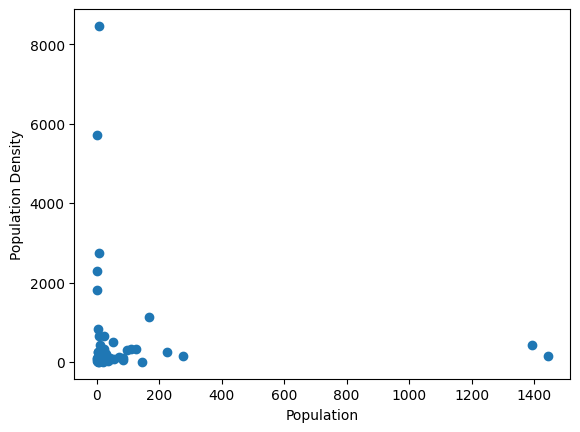

In [ ]:
x = densitydf['Population(million)']
y = densitydf['Population Density']
plt.xlabel("Population")
plt.ylabel("Population Density")
plt.scatter(x,y)

plt.show()

Store the Data in CSV file

In [ ]:
densitydf.to_csv("densitydata.csv")

# **Task 2: Get the GDP data from different URL**
